# **Submission Guidelines:**
1. Submit 1 jupyter notebook containing all the code, results and visualizations and 1 Word document discussing all the results and their comparative analysis.
2. Put these in a zip file named as `22i-7777_Name_BCY-A`
3. Naming convention for the 2 files should be as follows:
    NoteBook: `22i-7777_Name_BCY-A.ipynb` and Report: `22i-7777_Name_BCY-A.docx`.
4. No excuse or resubmission is permissible after the submission deadline.
5. Read the following for report submission guidelines,
    - Your report must contain at least three sections Introduction, Experimentation Explained, Conclusion
    - Your report must contain visual aid to show comparison between the algorithms
    - Font-size: 12,
    - Font-Family: Times New Roman,
    - Line-Spacing: 1.5pt
6. It is an individual assignment

By following these submission guidelines, you can ensure that your assignment is properly submitted and evaluated. Failure to adhere to these guidelines may result in the deduction of marks or other penalties.
<h4 style='color: red'><br>Deadline: 11:59 PM, 7th-March-2025</h4>

<h1 style='text-align: center'>ASSIGNMENT#02</h1>
<h1 style='text-align: center'>The Quest for a Treasure</h1>
<h2 style='text-align: center'> A comparitive analysis of Informed and Uninformed Searches</h2>

### Background Story
In a magical forest, a brave explorer named Arin sets out on an exciting adventure to find a treasure, hidden inside an ancient temple. The forest is like a giant maze, full of secret paths, magical barriers, and tricky traps.

Arin begins the journey at Campfire Point (S) and must find a way through the maze to reach the Temple (G), facing many challenges along the way.


### Graph Representation of the Forest
The enchanted forest is represented as a graph, where:

<ul>
        <li>Each node represents a location in the forest.</li>
        <li>Each edge represents a valid path.</li>
        <li>Some edges have higher costs due to difficult terrain.</li>
        <li>Portals act as direct jumps between distant nodes, bypassing obstacles.</li>
    </ul>
    
    

  
    
 <h2>Terrain Information</h2>
<p>Each terrain type in the forest has an associated movement cost as follows:</p>

<table border="1">
    <tr>
        <th>Terrain Type</th>
        <th>Marker</th>
        <th>Description</th>
        <th>Cost</th>
        <th>Color</th>
    </tr>
    <tr>
        <td>Normal Path</td>
        <td>0</td>
        <td>Walkable terrain</td>
        <td>1</td>
        <td>Light Gray</td>
    </tr>
    <tr>
        <td>Wall (❌)</td>
        <td>-1</td>
        <td>Impassable obstacle</td>
        <td>∞ (Not allowed)</td>
        <td>White</td>
    </tr>
    <tr>
        <td>Quicksand (⏳)</td>
        <td>2</td>
        <td>Slows movement</td>
        <td>3</td>
        <td>Yellow</td>
    </tr>
    <tr>
        <td>Portal (🔄)</td>
        <td>3</td>
        <td>Instantly moves to exit</td>
        <td>0 (Teleportation)</td>
        <td>Purple</td>
    </tr>
    <tr>
        <td>Wild Beasts (⚠️)</td>
        <td>4</td>
        <td>Dangerous area</td>
        <td>5</td>
        <td>Red</td>
    </tr>
    <tr>
        <td>Start (S)</td>
        <td>5</td>
        <td>Starting position</td>
        <td>0</td>
        <td>Green</td>
    </tr>
    <tr>
        <td>Goal (G)</td>
        <td>6</td>
        <td>Target location</td>
        <td>0</td>
        <td>Blue</td>
    </tr>
</table>


<h2>Task: Finding the Optimal Path</h2>
<p>Your goal is to find the optimal path from S (Campfire Point) to G (Temple of Lumora) using four search strategies.</p>

<h3>Search Strategies to Implement</h3>

You have to implement the following search strategies:
<ul>
    <li>Breadth-First Search (BFS)</li>
    <li>Depth-First Search (DFS)</li>
    <li>Uniform-Cost Search (UCS)</li>
    <li>Greedy Best-First Search (GBFS) (using the most appropriate heuristic)</li>
    <li>A* Search (using the most appropriate heuristic)</li>
</ul>


<h3>Performance Evaluation</h3>
<p>For each search algorithm, track and compare its performance based on the following metrics:</p>
<ul>
    <li> Path found (if any) and its total cost.</li>
    <li> Number of nodes expanded.</li>
    <li> Execution time (using Python’s time module).</li>
    <li> Memory usage (using Python’s psutil or tracemalloc module).</li>
    <li> List of all obstacles faced during the search process.</li>
</ul>

<h3>Visualization Requirements</h3>
<p Generate visualizations to better understand the search performance:</p>
<ul>
    <li>Graph or heatmap of the search process.</li>
    <li>Comparative bar charts showing execution time and memory usage for each algorithm</li>
</ul>

<h3> Hints & Guidelines:</h3>
<ul>
    <li>Use Matplotlib to visualize the paths and performance comparisons.</li>
    <li>Experiment with different heuristics for A* and compare results.</li>
    <li>Use Python’s psutil or tracemalloc module for memory analysis of each algorithm. </li>
</ul>

<h3>Submission Requirements</h3>
<ul>
    <li> Implement the search algorithms in Python.</li>
    <li> Clearly indicate the explored nodes, final path, and total cost.</li>
    <li> Provide visualizations and comparative analysis.</li>
    <li> Discuss the most efficient search strategy based on your findings.</li>
</ul>


### Importing Necessary Modules/Functions


In [10]:
# Random and numpy array imported
from random import randint
from numpy import array

<p style='color: red'>No Changes Should be Made to This Cell</p>

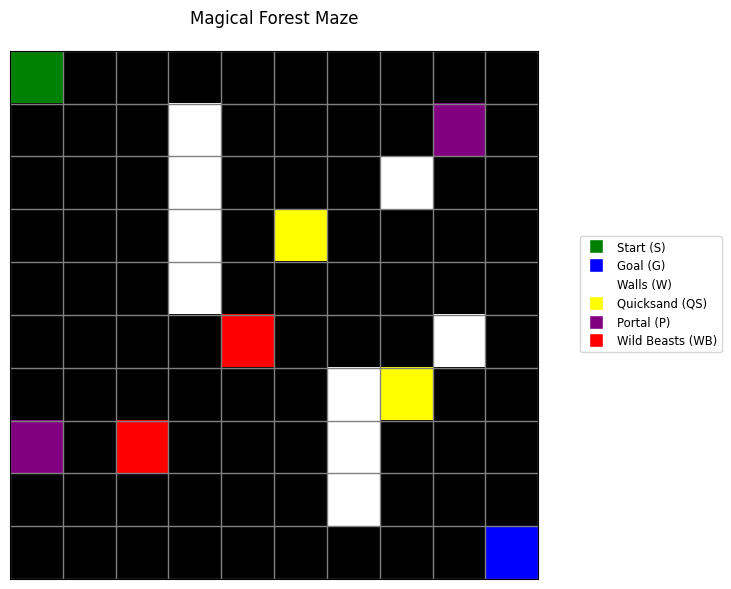

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define grid size
N, M = 10, 10

# Define symbols
START, GOAL = (0, 0), (9, 9)
WALL, PATH, QUICKSAND, PORTAL, BEAST = -1, 0, 2, 3, 4

# Create an empty grid
grid = np.zeros((N, M))

# Add walls in a controlled manner
walls = [(1, 3), (2, 3), (3, 3), (4, 3), (6, 6), (7, 6), (8, 6), (5, 8), (2, 7)]
for w in walls:
    grid[w] = WALL

# Ensure a clear path by removing unnecessary blockages
clear_path = [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5)]
for p in clear_path:
    grid[p] = PATH

# Add special terrain strategically
grid[3, 5] = QUICKSAND  # Slower path
grid[6, 7] = QUICKSAND  # Another slow zone
grid[5, 4] = BEAST  # Dangerous zone
grid[7, 2] = BEAST  # Another dangerous area

# Place portals strategically
grid[1, 8] = PORTAL  # Portal entrance
grid[7, 0] = PORTAL  # Portal exit

# Mark start and goal
grid[START] = 5  # Start point
grid[GOAL] = 6  # Goal point

# Define colormap for visualization
cmap = mcolors.ListedColormap(["white", "black", "yellow", "purple", "red", "green", "blue"])
bounds = [-1.5, -0.5, 0.5, 2.5, 3.5, 4.5, 5.5, 6.5]  # Boundaries for colors
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Plot the grid with color representation
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(grid, cmap=cmap, norm=norm, interpolation="nearest")

# Add grid lines and labels
ax.set_xticks(np.arange(N + 1) - 0.5, minor=True)
ax.set_yticks(np.arange(M + 1) - 0.5, minor=True)
ax.grid(which="minor", color="gray", linestyle='-', linewidth=1)
ax.tick_params(which="both", bottom=False, left=False, labelbottom=False, labelleft=False)

# Add legend outside the plot
legend_patches = [
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="green", markersize=10, label="Start (S)"),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="blue", markersize=10, label="Goal (G)"),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="white", markersize=10, label="Walls (W)"),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="yellow", markersize=10, label="Quicksand (QS)"),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="purple", markersize=10, label="Portal (P)"),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="red", markersize=10, label="Wild Beasts (WB)")
]

fig.legend(handles=legend_patches, loc="center left", fontsize="small", bbox_to_anchor=(1, 0.5))

plt.title("Magical Forest Maze", pad=20)
plt.tight_layout()
plt.show()


## Start Your Work From Here!

<p style='color: green'>You Can Start Writing Code and Make Changes to It from Here and Onwards</p>

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

Algorithm: BFS
Path found: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (1, 8), (2, 8), (3, 8), (4, 8), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]
Path length (steps): 18
Total cost: 14
Nodes expanded: 91
Execution time (s): 0.001092
Peak memory (bytes): 18864
Obstacles faced: {(-1, 8), (3, -1), (4, 3), (5, -1), (3, 10), (5, 10), (10, 0), (10, 6), (8, 6), (10, 3), (1, 3), (7, -1), (-1, 4), (-1, 1), (-1, 7), (7, 10), (3, 3), (9, -1), (0, -1), (10, 2), (2, -1), (10, 5), (0, 10), (2, 7), (10, 8), (2, 10), (6, -1), (-1, 0), (7, 6), (-1, 3), (-1, 9), (6, 10), (-1, 6), (4, -1), (4, 10), (8, -1), (5, 8), (10, 4), (10, 1), (1, -1), (10, 7), (8, 10), (2, 3), (1, 10), (6, 6), (-1, 2), (-1, 5)}

Algorithm: DFS
Path found: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (2, 8), (3, 8), (3, 7), (3, 6), (3, 5), (3, 4), (4, 4), (5, 4), (5, 5), (5, 6), (5, 7), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (9, 9)]
Path length (steps): 

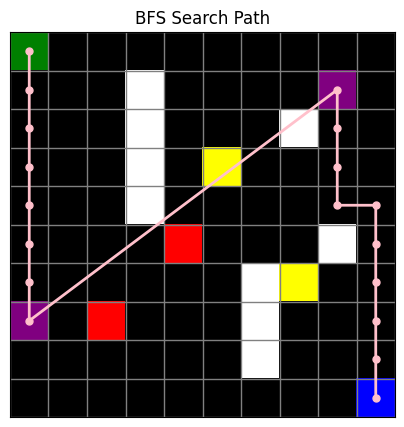

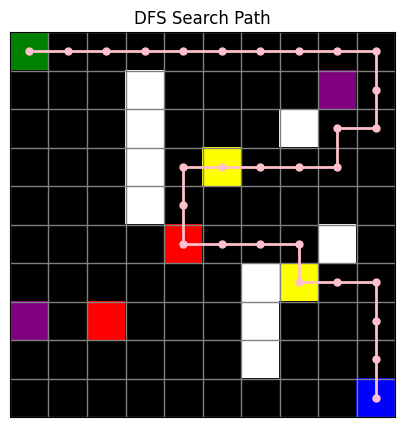

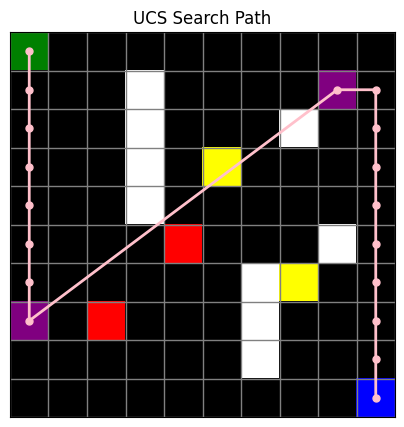

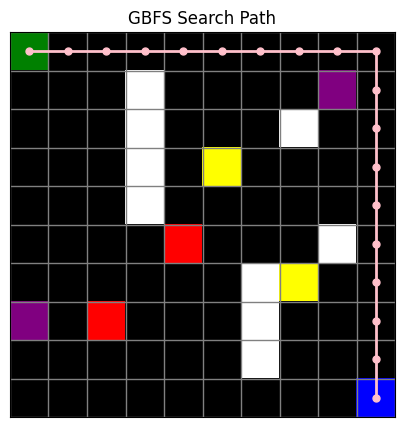

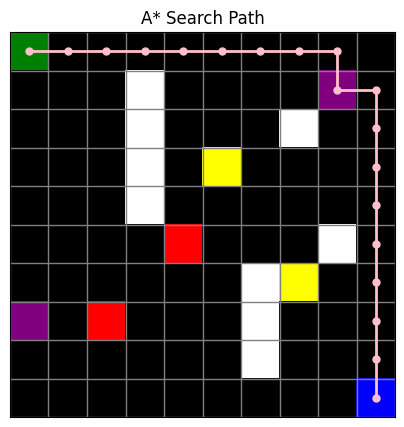

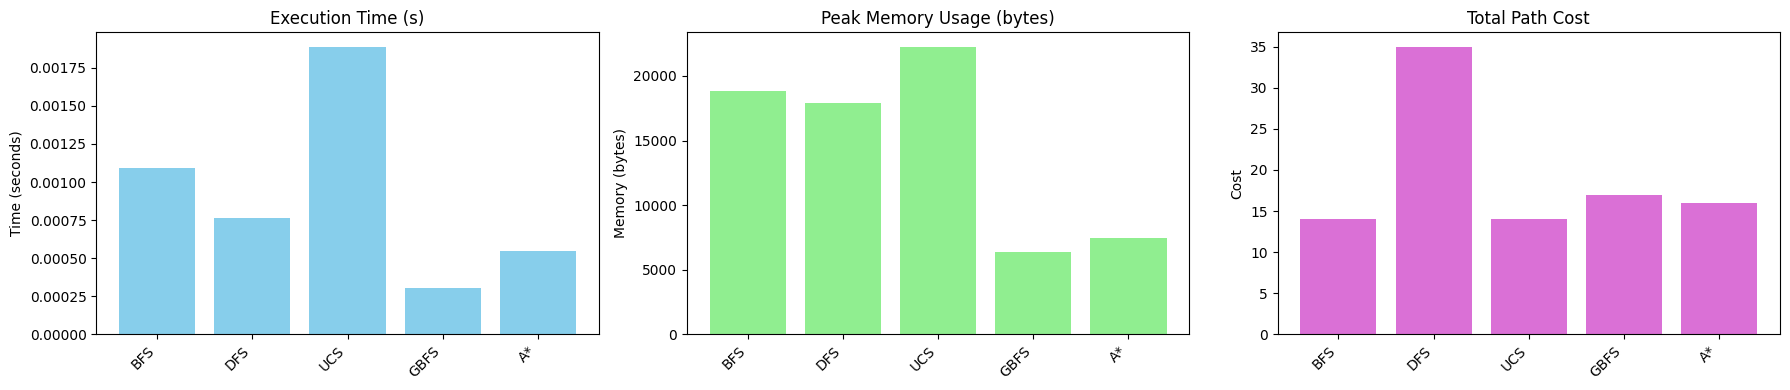

In [13]:
import time
import tracemalloc
from collections import deque
import heapq

# Portals
portals = {(1, 8): (7, 0), (7, 0): (1, 8)}

# assigning costs to terrains
terrain_cost = {
    -1: float('inf'),  # WALL
     0: 1,             # PATH
     2: 3,             # QUICKSAND
     3: 0,             # PORTAL
     4: 5,             # BEAST
     5: 0,             # START
     6: 0              # GOAL
}

# ensure cell (r,c) is within grid limits
def in_bounds(r, c, rows, cols):
    return 0 <= r < rows and 0 <= c < cols

# checks if a specific cell is a wall
def is_wall(r, c, grid):
    return grid[r, c] == WALL

# checks if a cell can be moved into (inbounds and not a wall)
def is_valid(cell, grid):
    r, c = cell
    if not in_bounds(r, c, grid.shape[0], grid.shape[1]):
        return False
    if is_wall(r, c, grid):
        return False
    return True

# finds cost of a specific cell
def get_cost(r, c, grid):
    val = grid[r, c]
    return terrain_cost.get(val, float('inf'))

# neighbours from current cell (up, down, left, right, see if portal)
def get_neighbors(cell, grid):
    (r, c) = cell
    neighbors = []

    directions = [(r-1, c), (r+1, c), (r, c-1), (r, c+1)]
    for nr, nc in directions:
        neighbors.append((nr, nc))

    if (r, c) in portals:
        neighbors.append(portals[(r, c)])

    return neighbors

# start to goal in reverse order to show sequence
def reconstruct_path(parents, start, goal):
    if goal not in parents and goal != start:
        return []
    path = []
    current = goal
    while current != start:
        path.append(current)
        current = parents[current]
    path.append(start)
    path.reverse()
    return path

# cost calculated by iterating the path constructed
def compute_path_cost(path, grid):
    total = 0
    for (r, c) in path:
        total += get_cost(r, c, grid)
    return total

# breadth first search
def bfs_search(grid, start, goal):
    queue = deque([start]) #explore nodes level by level
    visited = set([start]) #track visited to avoid revisiting
    parents = {} # predecessors recorded to later reconstruct
    expansions = 0 # count removed cells
    obstacles = set() #invalid cells

# loop till all cells explored
    while queue:
        current = queue.popleft() # fifo removes first cell in queue
        expansions += 1

# loop stops if path found from start to goal
        if current == goal:
            break

# checks valid cells
        for neighbor in get_neighbors(current, grid):
            if not is_valid(neighbor, grid):
                obstacles.add(neighbor)
                continue

# if neighbour unvisited, added to visited
            if neighbor not in visited:
                visited.add(neighbor)
                parents[neighbor] = current
                queue.append(neighbor)

    path = reconstruct_path(parents, start, goal)
    total_cost = compute_path_cost(path, grid)
    return path, total_cost, expansions, obstacles

# depth first search
def dfs_search(grid, start, goal):
    stack = [start] # lifo stack to manage nodes
    visited = set([start])
    parents = {}
    expansions = 0
    obstacles = set()

# loop till there are cells in stack
    while stack:
        current = stack.pop() # returns last element to explore down the branch
        expansions += 1 # one popped

        if current == goal:
            break

        for neighbor in get_neighbors(current, grid):
            if not is_valid(neighbor, grid):
                obstacles.add(neighbor)
                continue

            if neighbor not in visited:
                visited.add(neighbor)
                parents[neighbor] = current
                stack.append(neighbor)

    path = reconstruct_path(parents, start, goal)
    total_cost = compute_path_cost(path, grid)
    return path, total_cost, expansions, obstacles

# uniform cost search
def ucs_search(grid, start, goal):
    pq = [(0, start)] # priority queue to expland node with lowest comulative cost (implemented with heap)
    visited = set()
    parents = {}
    cost_so_far = {start: 0} # lowest cost so far
    expansions = 0
    obstacles = set()

# loop till empty pq
    while pq:
        current_cost, current = heapq.heappop(pq) # returns lowest lost
        expansions += 1

        if current == goal:
            break

        if current in visited:
            continue

        visited.add(current)

        for neighbor in get_neighbors(current, grid):
            if not is_valid(neighbor, grid):
                obstacles.add(neighbor)
                continue

            step_cost = get_cost(*neighbor, grid)
            new_cost = current_cost + step_cost

            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                parents[neighbor] = current
                heapq.heappush(pq, (new_cost, neighbor))

    path = reconstruct_path(parents, start, goal)
    total_cost = cost_so_far[goal] if path else float('inf')
    return path, total_cost, expansions, obstacles

# manhattan distance
def manhattan_distance(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# greedy BFS
def greedy_best_first_search(grid, start, goal):
    pq = [(manhattan_distance(start, goal), start)]
    visited = set([start])
    parents = {}
    expansions = 0
    obstacles = set()

# loop till pq has nodes
    while pq:
        _, current = heapq.heappop(pq) #smallest heuristic popper
        expansions += 1

        if current == goal:
            break

        for neighbor in get_neighbors(current, grid):
            if not is_valid(neighbor, grid):
                obstacles.add(neighbor)
                continue

            if neighbor not in visited:
                visited.add(neighbor)
                parents[neighbor] = current
                h = manhattan_distance(neighbor, goal)
                heapq.heappush(pq, (h, neighbor))

    path = reconstruct_path(parents, start, goal)
    total_cost = compute_path_cost(path, grid)
    return path, total_cost, expansions, obstacles

# A star
def a_star_search(grid, start, goal):
    start_cost = 0
    start_heuristic = manhattan_distance(start, goal)
    pq = [(start_cost + start_heuristic, start)]

    visited = set()
    parents = {}
    cost_so_far = {start: 0}
    expansions = 0
    obstacles = set()

    while pq:
        current_f, current = heapq.heappop(pq)
        expansions += 1

        if current == goal:
            break

        if current in visited:
            continue

        visited.add(current)

        for neighbor in get_neighbors(current, grid):
            if not is_valid(neighbor, grid):
                obstacles.add(neighbor)
                continue

            step_cost = get_cost(*neighbor, grid)
            new_cost = cost_so_far[current] + step_cost

            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                parents[neighbor] = current
                f_score = new_cost + manhattan_distance(neighbor, goal)
                heapq.heappush(pq, (f_score, neighbor))

    path = reconstruct_path(parents, start, goal)
    total_cost = cost_so_far[goal] if path else float('inf')
    return path, total_cost, expansions, obstacles

def run_search(search_func, grid, start, goal):
    tracemalloc.start()
    start_time = time.time()

    path, total_cost, expansions, obstacles = search_func(grid, start, goal)

    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    return {
        'path': path,
        'cost': total_cost,
        'expansions': expansions,
        'time': (end_time - start_time),
        'memory': peak,
        'obstacles': obstacles
    }

search_algorithms = {
    "BFS": bfs_search,
    "DFS": dfs_search,
    "UCS": ucs_search,
    "GBFS": greedy_best_first_search,
    "A*": a_star_search
}

results = {}
for name, func in search_algorithms.items():
    results[name] = run_search(func, grid, START, GOAL)

# Print summary for each algorithm
for name, data in results.items():
    print(f"Algorithm: {name}")
    print(f"Path found: {data['path']}")
    print(f"Path length (steps): {len(data['path'])}")
    print(f"Total cost: {data['cost']}")
    print(f"Nodes expanded: {data['expansions']}")
    print(f"Execution time (s): {data['time']:.6f}")
    print(f"Peak memory (bytes): {data['memory']}")
    print(f"Obstacles faced: {data['obstacles']}")
    print()

# Function to visualize a path on the grid
def plot_path(grid, path, title="Path Visualization"):
    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(grid, cmap=cmap, norm=norm, interpolation="nearest")
    ax.set_xticks(np.arange(N + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(M + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="gray", linestyle='-', linewidth=1)
    ax.tick_params(which="both", bottom=False, left=False, labelbottom=False, labelleft=False)

    if path:
        xs = [p[1] for p in path]
        ys = [p[0] for p in path]
        ax.plot(xs, ys, marker="o", color="pink", linewidth=2, markersize=5)

    ax.set_title(title)
    plt.show()

for name, data in results.items():
    plot_path(grid, data['path'], title=f"{name} Search Path")

# Comparative bar charts for execution time and memory usage
algo_names = list(results.keys())
times = [results[a]['time'] for a in algo_names]
mems  = [results[a]['memory'] for a in algo_names]
costs = [results[a]['cost'] for a in algo_names]

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Execution time bar chart
axes[0].bar(algo_names, times, color='skyblue')
axes[0].set_title("Execution Time (s)")
axes[0].set_ylabel("Time (seconds)")
axes[0].set_xticks(range(len(algo_names)))
axes[0].set_xticklabels(algo_names, rotation=45, ha='right')

# Memory usage bar chart
axes[1].bar(algo_names, mems, color='lightgreen')
axes[1].set_title("Peak Memory Usage (bytes)")
axes[1].set_ylabel("Memory (bytes)")
axes[1].set_xticks(range(len(algo_names)))
axes[1].set_xticklabels(algo_names, rotation=45, ha='right')

# Total cost bar chart
axes[2].bar(algo_names, costs, color='orchid')
axes[2].set_title("Total Path Cost")
axes[2].set_ylabel("Cost")
axes[2].set_xticks(range(len(algo_names)))
axes[2].set_xticklabels(algo_names, rotation=45, ha='right')

plt.tight_layout()
plt.show()


<hr style="height:1px;border:none;color:#333;background-color:#333;" />